# Trabajo práctico integrador

**Nombre**:

## Primera Parte (Clase 1 y 2)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [15]:
x = np.random.randint(5, size=(3,3))
print("La matriz es: \n",x)


def norms(p):
    size = len(x)
    for i in range(size):
        if p != 0 and p != np.inf:
            norm_p = np.sum(abs(x[i]) ** p) ** (1/p)
            if p == 1:
                print(f"Las norma l1 del vector {i+1}: ",norm_p)
            else:
                print(f"Las normas l2 de los vector {i+1}: ",norm_p)
        elif p == 0:
            norm_p = np.sum(abs(x[i]) != 0) #cantidad de elementos no nulos
            print(f"Las norma l0 de los vector {i+1}: ",norm_p)
        else:
            norm_p = np.max((abs(x[i])))
            print(f"La norma inf del vector {i+1}: ",norm_p)
    return 0

#norm l1
p_l1 = 1
norms(p_l1)

#norm l2
p_l2 = 2
norms(p_l2)

#norm l0
p_l0 = 0
norms(p_l0)

#norm inf
p_linf = np.inf
norms(p_linf)

La matriz es: 
 [[1 0 1]
 [1 0 1]
 [4 3 0]]
Las norma l1 del vector 1:  2.0
Las norma l1 del vector 2:  2.0
Las norma l1 del vector 3:  7.0
Las normas l2 de los vector 1:  1.4142135623730951
Las normas l2 de los vector 2:  1.4142135623730951
Las normas l2 de los vector 3:  5.0
Las norma l0 de los vector 1:  2
Las norma l0 de los vector 2:  2
Las norma l0 de los vector 3:  2
La norma inf del vector 1:  1
La norma inf del vector 2:  1
La norma inf del vector 3:  4


0

### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [16]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

#using logical AND to get the TP op: 1 and 1 = true
compare01_and = np.logical_and(truth,prediction)
print(compare01_and)
#seeking true values and sum them to get tp
tp_rate = len(compare01_and[np.nonzero(compare01_and == 1)])
print("TP: ",tp_rate)

#using logical OR since there should be just one false = 0 or 0 
compare02 = np.logical_or(truth,prediction)
print(compare02)
#seeking true values and sum them to get tn
tn_rate = len(compare02[np.nonzero(compare02 == 0)])
print("TN: ",tn_rate)

#using XOR against first AND vs truth array will give me FN
compare03 = np.logical_xor(compare01_and,truth)
print(compare03)
#getting the rate of FN
fn_rate = len(compare03[np.nonzero(compare03 == 1)])
print("FN: ",fn_rate)

compare04 = np.logical_xor(compare01_and,prediction)
print(compare04)
fp_rate = len(compare04[np.nonzero(compare04 == 1)])
print("FP: ",fp_rate)

precision = (tp_rate)/(tp_rate + fp_rate)
recall = (tp_rate)/(tp_rate + fn_rate)
accuracy = (tp_rate + tn_rate)/(tp_rate + tn_rate + fp_rate + fn_rate)
print(f"Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}")

[ True  True False  True False False False False False False]
TP:  3
[ True  True  True  True  True  True  True  True False  True]
TN:  1
[False False False False  True  True False False False  True]
FN:  3
[False False  True False False False  True  True False False]
FP:  3
Precision: 0.5, Recall: 0.5, Accuracy: 0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [ ]:
# ejercicio 3

## Segunda Parte (Clase 3 y 4)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [8]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [9]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


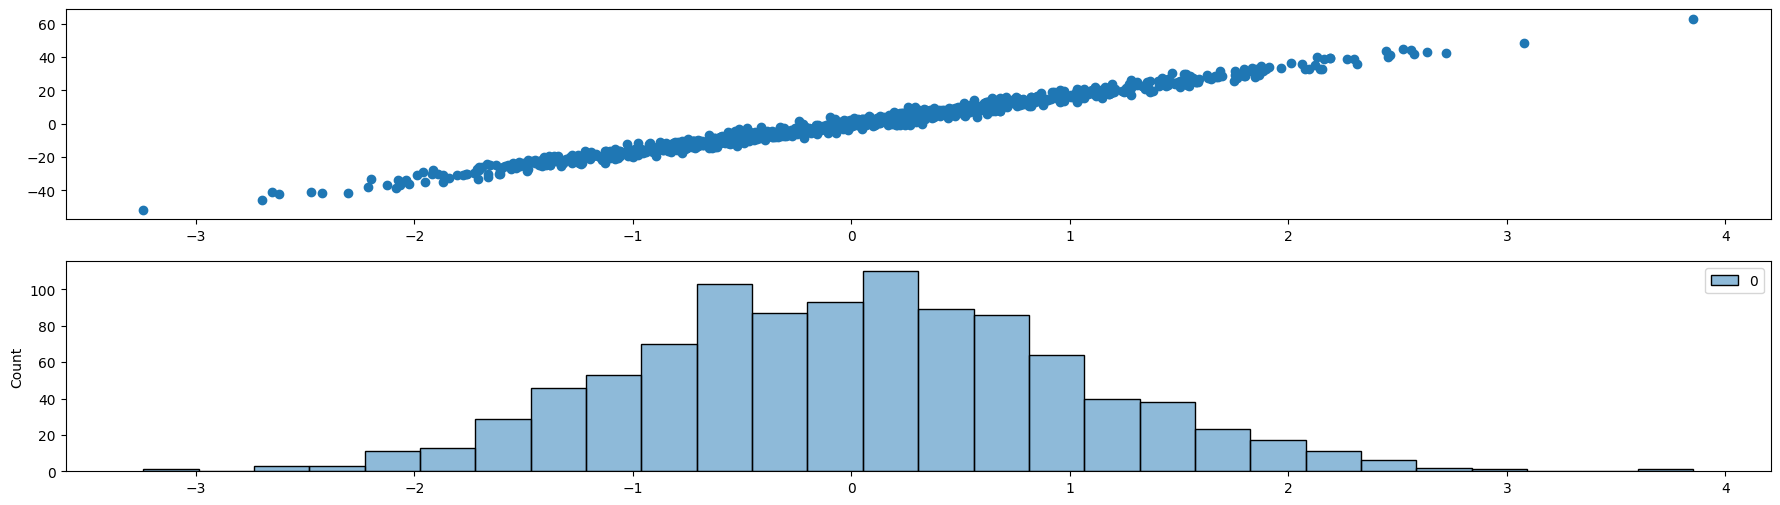

In [10]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [12]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [13]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

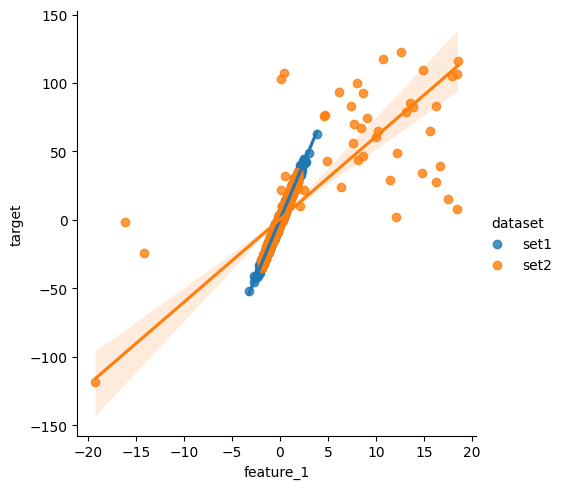

In [14]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset:
    Number-of-cars  Rush-hour
0             167          1
1              53          1
2              98          0
3             136          1
4             103          1

training percentage: 0.7
test percentage: 0.1
trianing rows [18  1 19  8 10 17  6 13  4  2  5 14  9  7]
validation rows [16 11  3  0]
test rows[15 12]
Total training data:  14
Total validation data:  4
Total test data:  2


<function matplotlib.pyplot.show(close=None, block=None)>

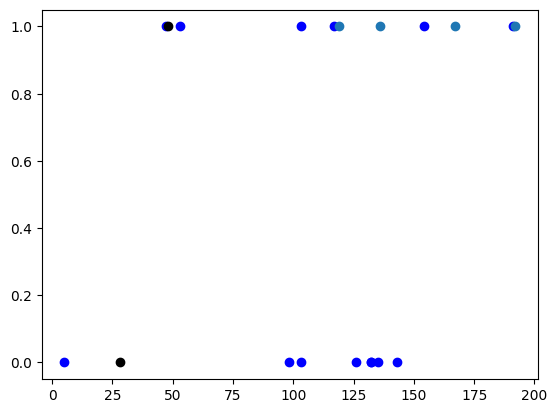

In [40]:
def split(df: pd.DataFrame, train_percentage: float, test_percentage: float):
    
    #defining X
    x_layer = df['Number-of-cars']
    #defining y
    y_layer = df['Rush-hour']

    np.random.seed(0)
    df_length = len(df)
    train_size = int(df_length * train_percentage)

    #Permuting rows in the dataset to avoid any kind of pattern
    permute_index = np.random.permutation(df_length)
    #get train data using slicing
    train_df = permute_index[0:train_size]
    print(f"trianing rows {train_df}")
    #get validation data using slicing
    valid_df = permute_index[train_size:int(df_length - test_percentage * df_length)]
    print(f"validation rows {valid_df}")
    #get test data
    test_df = permute_index[int(df_length - test_percentage * df_length):df_length]
    print(f"test rows{test_df}")

    print("Total training data: ",len(train_df))
    print("Total validation data: ",len(valid_df))
    print("Total test data: ",len(test_df))
    
    #X train-validation-test
    X_train = x_layer[train_df]
    X_val = x_layer[valid_df]
    X_test = x_layer[test_df]

    #X train-validation-test
    Y_train = y_layer[train_df]
    Y_val = y_layer[valid_df]
    Y_test =y_layer[test_df]

    return  X_train, X_val, X_test, Y_train, Y_val, Y_test

#Generating data
num_car = np.random.randint(5,200, size=(20))
rush_hour = np.random.binomial(1,0.5,size=[20])
data = {'Number-of-cars': num_car, 
        'Rush-hour': rush_hour}
#print(f"Generating data:\n {data}\n")
#Generating data frame
dataset = pd.DataFrame(data)
print(f"Dataset:\n {dataset.head()}\n")
#training size
train_percentage = 0.7
print(f"training percentage: {train_percentage}")
#test size
test_percentage = 0.1
print(f"test percentage: {test_percentage}")

#splitting dataset in train, validation and test
X_train, X_val, X_test, Y_train, Y_val, Y_test = split(dataset, train_percentage, test_percentage)
plt.scatter(X_train, Y_train, color='b')
plt.scatter(X_test, Y_test, color = 'k')
plt.scatter(X_val, Y_val)
plt.show

### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
* Uno normal con poco `noise` y pocos outliers
* Uno con mucho `noise` y pocos outliers
* Uno con poco `noise` y muchos outliers
* Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV

# Crear datasets
from sklearn.datasets import make_regression

In [281]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [282]:
# Creamos funcion que arma dataset
def dataset_build(samples: int, feature: int, noi: int, infor: int, random: int):
    x_input01, y_output01 = make_regression(n_samples = samples,
                        n_features = feature,
                        noise = noi,
                        n_informative = infor,
                        random_state = random)

    data = np.append(x_input01,y_output01.reshape(-1,1),axis=1)

    df = pd.DataFrame(data)

    new_col = []
    i = 0
    for col in df.columns:
        if i ==  len(df.columns) - 1:
            new_col.append("target")
        else :
            new_col.append("feature_" + str(i+1))
        i += 1
        
    df.columns = new_col
    print(df.columns)
    return df

In [283]:
#Dataset normal con poco noise y pocos outliers
dataset_01 = dataset_build(samples = 1000, feature = 2, noi = 2, infor = 3, random = 42)
dataset_01.head()

Index(['feature_1', 'feature_2', 'target'], dtype='object')


,feature_1,feature_2,target
0,-0.167118,0.146714,-7.667415
1,-0.020902,0.117327,-2.596771
2,0.150419,0.364961,10.381293
3,0.555604,0.089581,19.900564
4,0.058209,-1.142970,-6.979118


In [284]:
#Dataset con mucho noise y pocos outliers
dataset_02 = dataset_build(samples = 1000, feature = 2, noi = 100, infor = 1, random = 42)
dataset_02.head()

Index(['feature_1', 'feature_2', 'target'], dtype='object')


,feature_1,feature_2,target
0,-1.448084,-1.407464,-0.495190
1,-1.234349,-0.592464,-33.584975
2,-0.466037,-1.594703,-42.063674
3,-0.641482,0.431923,-167.758495
4,1.612221,0.896839,219.020042


In [285]:
#Dataset con poco noise y muchos outliers
dataset_03 = dataset_build(samples = 1000, feature = 100, noi = 2, infor = 50, random = 42)
dataset_03.head()

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_92', 'feature_93', 'feature_94', 'feature_95', 'feature_96',
       'feature_97', 'feature_98', 'feature_99', 'feature_100', 'target'],
      dtype='object', length=101)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,target
0,-0.324738,1.905905,0.382882,0.896614,-0.213846,-2.019286,-0.039268,-1.006733,-2.089233,-0.422321,...,-1.078851,2.764349,-0.431317,-1.825635,-0.230766,-0.624095,0.876371,0.671192,0.447822,172.736237
1,1.161267,-0.779928,1.224258,-0.593205,1.470130,-0.145885,-0.720259,-0.768811,0.460683,0.206755,...,-0.624292,-1.477340,0.003973,0.487645,1.318580,0.239591,0.435529,1.204499,0.267728,-36.707150
2,-0.098845,0.252569,-1.171654,0.569760,0.195482,-1.255135,-0.077221,0.522251,-2.929449,-1.336725,...,0.664927,-0.361311,0.207803,0.695402,-2.603137,2.046862,0.418206,-0.614123,-0.477646,389.906062
3,-0.950890,-1.633886,-0.681996,-1.201104,1.916263,0.284127,-0.487450,-0.800161,0.969022,0.002130,...,0.187553,0.503798,-0.970735,-0.403422,-0.445155,-0.647852,0.054882,-0.430724,0.835615,-247.308417
4,-1.532942,0.011581,-0.525396,-0.785818,2.542034,0.086399,1.008111,0.171918,-1.331512,-2.102958,...,-1.210553,-0.806277,0.933262,1.272665,-1.276386,0.549241,-1.145878,-0.889108,0.005471,247.205437


In [286]:
#Dataset con mucho noise y muchos outliers
dataset_04 = dataset_build(samples = 500, feature = 100, noi = 100, infor = 50, random = 42)
dataset_04.head()

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_92', 'feature_93', 'feature_94', 'feature_95', 'feature_96',
       'feature_97', 'feature_98', 'feature_99', 'feature_100', 'target'],
      dtype='object', length=101)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,target
0,-0.749341,-1.563741,0.086459,0.256514,0.853167,0.741156,-1.393804,-0.525972,-0.326060,1.087318,...,0.491661,0.535215,-1.052509,1.133943,0.204147,-1.040902,-0.180890,-0.595471,-0.071149,135.030559
1,0.863827,0.989599,-1.258296,-0.015866,0.937406,0.585992,-0.128551,-0.303863,-0.816738,-0.653897,...,1.509547,0.625290,-0.203760,-0.286301,-1.396229,0.140293,-0.441476,-0.082137,-0.872511,-37.831188
2,1.910253,0.292893,0.220134,-0.719162,-0.489479,-1.551227,-0.088934,0.715765,1.305779,-0.026071,...,0.839829,1.302654,-0.704228,-0.725538,1.487652,1.672930,-0.026336,0.017642,0.812034,549.042406
3,-0.715338,1.246165,-1.193712,1.189283,-0.112970,0.567306,0.326671,0.707106,-1.510925,0.241915,...,-0.945468,0.728742,0.257862,0.661185,2.218743,0.717931,-0.566976,0.283270,0.939029,582.333250
4,-2.233936,-0.657501,-0.440847,-0.779695,-0.434890,0.066262,-0.423816,-0.565155,-1.147380,0.343098,...,-0.953070,-1.142284,-1.483124,-0.122949,0.006870,-0.551977,0.269789,0.976786,0.373060,-979.947161


In [287]:
#outlier for dataset01 
df_outlier01 = generate_outliers(dataset_01,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

In [288]:
#spliting function
def split(df: pd.DataFrame, train_percentage: float, test_percentage: float):
    
    #defining X
    x_layer = df['feature_1']
    #defining y
    y_layer = df['target']

    np.random.seed(0)
    df_length = len(df)
    train_size = int(df_length * train_percentage)

    #Permuting rows in the dataset to avoid any kind of pattern
    permute_index = np.random.permutation(df_length)
    #get train data using slicing
    train_df = permute_index[0:train_size]

    #get validation data using slicing
    valid_df = permute_index[train_size:int(df_length - test_percentage * df_length)]
    
    #get test data
    test_df = permute_index[int(df_length - test_percentage * df_length):df_length]
    
    
    #X train-validation-test
    X_train = x_layer[train_df]
    X_val = x_layer[valid_df]
    X_test = x_layer[test_df]

    #X train-validation-test
    Y_train = y_layer[train_df]
    Y_val = y_layer[valid_df]
    Y_test =y_layer[test_df]

    return  X_train, X_val, X_test, Y_train, Y_val, Y_test

0.4815269938390201
0.4209046112795626
0.4799636068622213


/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(close=None, block=None)>

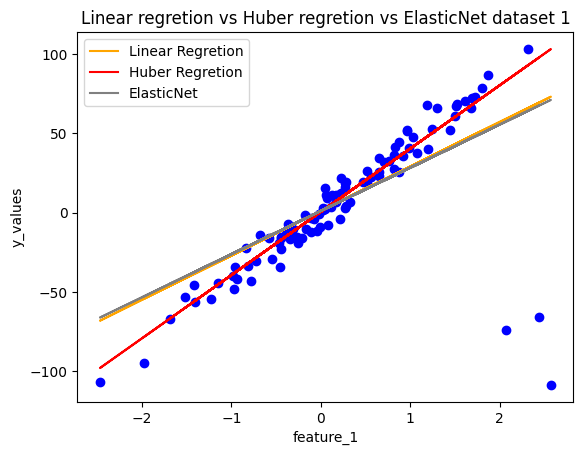

In [289]:
#get data splitted in train validation and test for dataset01
train_percentage = 0.7
test_percentage = 0.1
X_train01, X_val01, X_test01, Y_train01, Y_val01, Y_test01 = split(df_outlier01, train_percentage, test_percentage)

#passing tuple to array format and reshaping
X_train01 = np.array(X_train01).reshape(-1,1)
X_test01 = np.array(X_test01).reshape(-1,1)
Y_train01 = np.array(Y_train01).reshape(-1,1)
Y_test01 = np.array(Y_test01).reshape(-1,1)

#Using linear Regression
linear_regression01 = LinearRegression()
linear_regression01.fit(X_train01,Y_train01)
print(linear_regression01.score(X_test01,Y_test01))

#Using Huber Regretion
huber_regresor01 = HuberRegressor()
huber_regresor01.fit(X_train01,Y_train01)
print(huber_regresor01.score(X_test01,Y_test01))

#Using ElasticNetCV
elasticnet_regresor01 = ElasticNetCV()
elasticnet_regresor01.fit(X_train01,Y_train01)
print(elasticnet_regresor01.score(X_test01,Y_test01))

#prediction
predic_linearR_y = linear_regression01.predict(X_test01)
predic_huberR_y = huber_regresor01.predict(X_test01)
predic_elastic_y = elasticnet_regresor01.predict(X_test01)

#building graph
plt.scatter(X_test01,Y_test01,color='blue')
plt.plot(X_test01, predic_linearR_y, color='orange', label ="Linear Regretion")
plt.plot(X_test01, predic_huberR_y, color = 'red', label ="Huber Regretion")
plt.plot(X_test01, predic_elastic_y, color = 'gray', label ="ElasticNet")
plt.legend(loc="upper left")
plt.title("Linear regretion vs Huber regretion vs ElasticNet dataset 1")
plt.ylabel("y_values")
plt.xlabel("feature_1")
plt.show


In [290]:
#outlier for dataset02 
df_outlier02 = generate_outliers(dataset_02,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

0.0536500054735749
0.05560145858863763
0.05263179318999056


/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(close=None, block=None)>

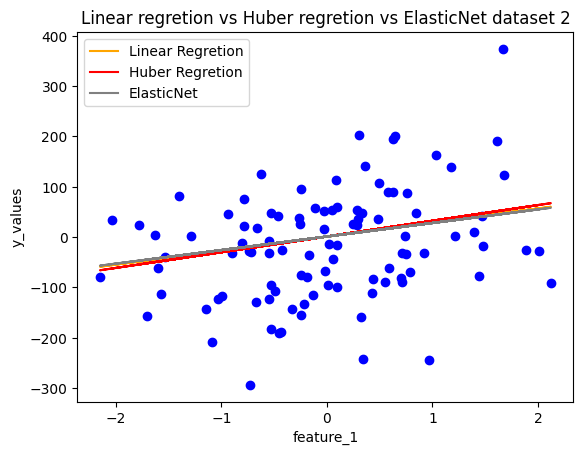

In [291]:
#get data splitted in train validation and test for dataset02
train_percentage = 0.7
test_percentage = 0.1
X_train02, X_val02, X_test02, Y_train02, Y_val02, Y_test02 = split(df_outlier02, train_percentage, test_percentage)

#passing tuple to array format and reshaping
X_train02 = np.array(X_train02).reshape(-1,1)
X_test02 = np.array(X_test02).reshape(-1,1)
Y_train02 = np.array(Y_train02).reshape(-1,1)
Y_test02 = np.array(Y_test02).reshape(-1,1)

#Using linear Regression
linear_regression02 = LinearRegression()
linear_regression02.fit(X_train02,Y_train02)
print(linear_regression02.score(X_test02,Y_test02))

#Using Huber Regretion
huber_regresor02 = HuberRegressor()
huber_regresor02.fit(X_train02,Y_train02)
print(huber_regresor02.score(X_test02,Y_test02))

#Using ElasticNetCV
elasticnet_regresor02 = ElasticNetCV()
elasticnet_regresor02.fit(X_train02,Y_train02)
print(elasticnet_regresor02.score(X_test02,Y_test02))

#prediction
predic_linearR_y02 = linear_regression02.predict(X_test02)
predic_huberR_y02 = huber_regresor02.predict(X_test02)
predic_elastic_y02 = elasticnet_regresor02.predict(X_test02)

#building graph
plt.scatter(X_test02,Y_test02,color='blue')
plt.plot(X_test02, predic_linearR_y02, color='orange',label ="Linear Regretion")
plt.plot(X_test02, predic_huberR_y02, color = 'red',label ="Huber Regretion")
plt.plot(X_test02, predic_elastic_y02, color = 'gray',label ="ElasticNet")
plt.legend(loc="upper left")
plt.title("Linear regretion vs Huber regretion vs ElasticNet dataset 2")
plt.ylabel("y_values")
plt.xlabel("feature_1")
plt.show

In [295]:
#outlier for dataset03 
df_outlier03 = generate_outliers(dataset_03,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

-0.08393339265847422
-0.08756663660939079
-0.08430985501862498


/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(close=None, block=None)>

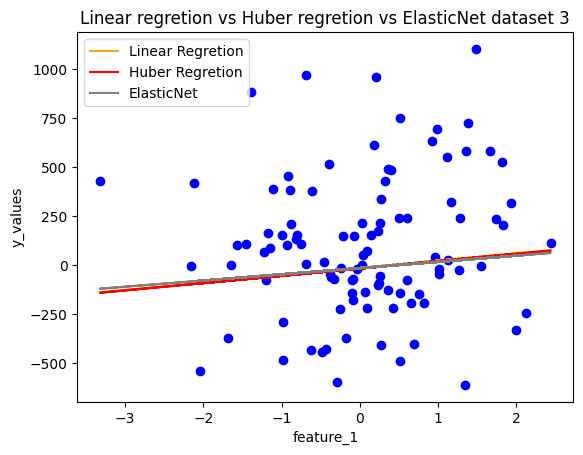

In [296]:
#get data splitted in train validation and test for dataset02
train_percentage = 0.7
test_percentage = 0.1
X_train03, X_val03, X_test03, Y_train03, Y_val03, Y_test03 = split(df_outlier03, train_percentage, test_percentage)

#passing tuple to array format and reshaping
X_train03 = np.array(X_train03).reshape(-1,1)
X_test03 = np.array(X_test03).reshape(-1,1)
Y_train03 = np.array(Y_train03).reshape(-1,1)
Y_test03 = np.array(Y_test03).reshape(-1,1)

#Using linear Regression
linear_regression03 = LinearRegression()
linear_regression03.fit(X_train03,Y_train03)
print(linear_regression03.score(X_test03,Y_test03))

#Using Huber Regretion
huber_regresor03 = HuberRegressor()
huber_regresor03.fit(X_train03,Y_train03)
print(huber_regresor03.score(X_test03,Y_test03))

#Using ElasticNetCV
elasticnet_regresor03 = ElasticNetCV()
elasticnet_regresor03.fit(X_train03,Y_train03)
print(elasticnet_regresor03.score(X_test03,Y_test03))

#prediction
predic_linearR_y03 = linear_regression03.predict(X_test03)
predic_huberR_y03 = huber_regresor03.predict(X_test03)
predic_elastic_y03 = elasticnet_regresor03.predict(X_test03)

#Building graph
plt.plot(X_test03, predic_linearR_y03, color='orange',label ="Linear Regretion")
plt.plot(X_test03, predic_huberR_y03, color = 'red',label ="Huber Regretion")
plt.plot(X_test03, predic_elastic_y03, color = 'gray',label ="ElasticNet")
plt.legend(loc="upper left")
plt.scatter(X_test03,Y_test03,color='blue')
plt.title("Linear regretion vs Huber regretion vs ElasticNet dataset 3")
plt.ylabel("y_values")
plt.xlabel("feature_1")
plt.show

In [298]:
#outlier for dataset04 
df_outlier04 = generate_outliers(dataset_04,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

0.000807245840791615
0.001935231644250579
-0.000294639205627778


/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hectorsanchez/intro_ia/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(close=None, block=None)>

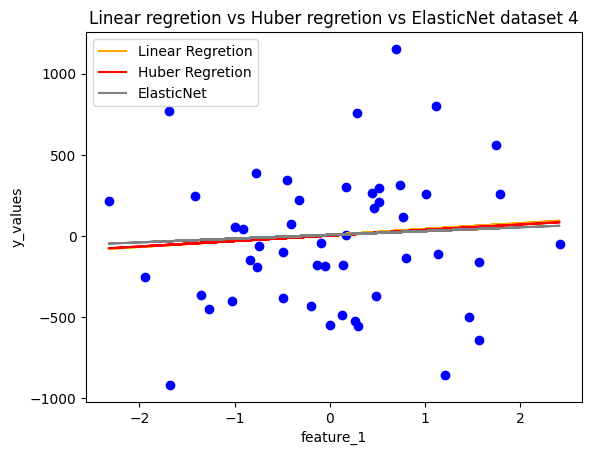

In [299]:
#get data splitted in train validation and test for dataset02
train_percentage = 0.7
test_percentage = 0.1
X_train04, X_val04, X_test04, Y_train04, Y_val04, Y_test04 = split(df_outlier04, train_percentage, test_percentage)

#passing tuple to array format and reshaping
X_train04 = np.array(X_train04).reshape(-1,1)
X_test04 = np.array(X_test04).reshape(-1,1)
Y_train04 = np.array(Y_train04).reshape(-1,1)
Y_test04 = np.array(Y_test04).reshape(-1,1)

#Using linear Regression
linear_regression04 = LinearRegression()
linear_regression04.fit(X_train04,Y_train04)
print(linear_regression04.score(X_test04,Y_test04))

#Using Huber Regretion
huber_regresor04 = HuberRegressor()
huber_regresor04.fit(X_train04,Y_train04)
print(huber_regresor04.score(X_test04,Y_test04))

#Using ElasticNetCV
elasticnet_regresor04 = ElasticNetCV()
elasticnet_regresor04.fit(X_train04,Y_train04)
print(elasticnet_regresor04.score(X_test04,Y_test04))

#prediction
predic_linearR_y04 = linear_regression04.predict(X_test04)
predic_huberR_y04 = huber_regresor04.predict(X_test04)
predic_elastic_y04 = elasticnet_regresor04.predict(X_test04)

#Building graph
plt.plot(X_test04, predic_linearR_y04, color='orange',label ="Linear Regretion")
plt.plot(X_test04, predic_huberR_y04, color = 'red',label ="Huber Regretion")
plt.plot(X_test04, predic_elastic_y04, color = 'gray',label ="ElasticNet")
plt.legend(loc="upper left")
plt.scatter(X_test04,Y_test04,color='blue')
plt.title("Linear regretion vs Huber regretion vs ElasticNet dataset 4")
plt.ylabel("y_values")
plt.xlabel("feature_1")
plt.show

### Analisis

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`